### Heart attack predictions

### About this dataset

In [26]:
## pandas 
import pandas as pd
import numpy as np
## visualizations
import seaborn as sns
import matplotlib.pyplot as plt
## machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing the data

In [2]:
df = pd.read_csv('heart.csv')
sat = pd.read_csv('o2Saturation.csv')

In [3]:
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
print(sat.shape)

(3585, 1)


### Info on the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


1    165
0    138
Name: output, dtype: int64


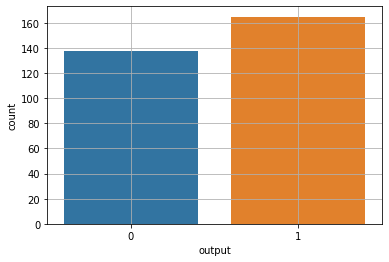


% values
1    54.46
0    45.54
Name: output, dtype: float64


In [11]:
sns.countplot(df.output)
print(df.output.value_counts())
plt.grid()
plt.show()
print('\n% values')
print(round(df.output.value_counts(normalize=True)*100,2))

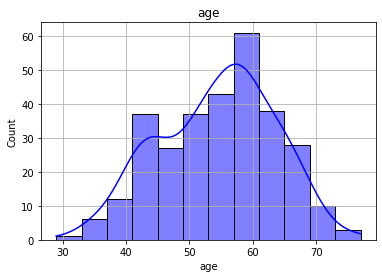

------------------------------------------------------------


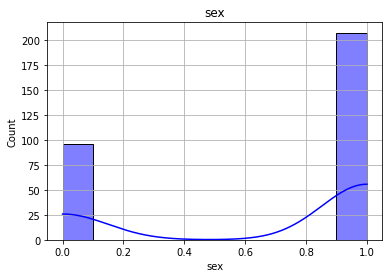

------------------------------------------------------------


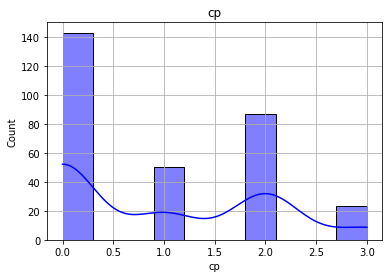

------------------------------------------------------------


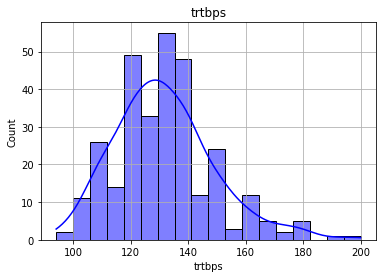

------------------------------------------------------------


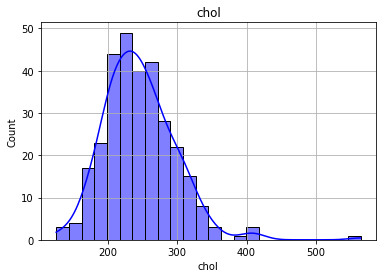

------------------------------------------------------------


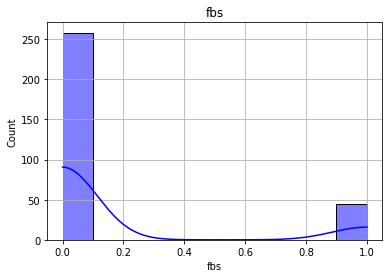

------------------------------------------------------------


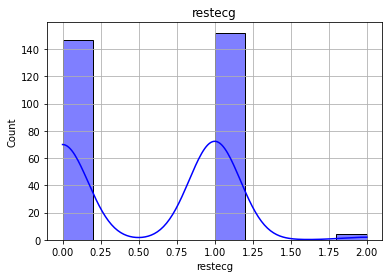

------------------------------------------------------------


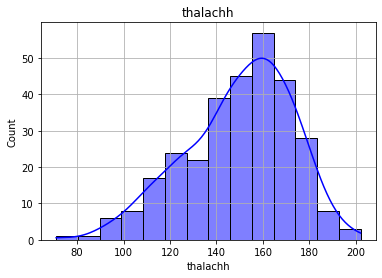

------------------------------------------------------------


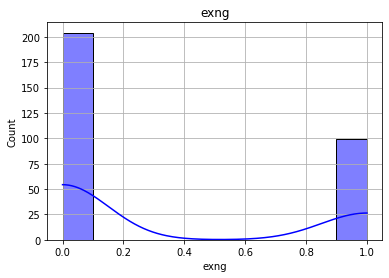

------------------------------------------------------------


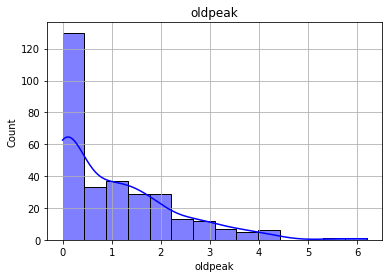

------------------------------------------------------------


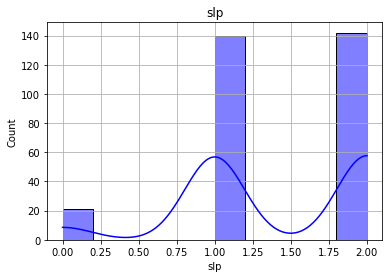

------------------------------------------------------------


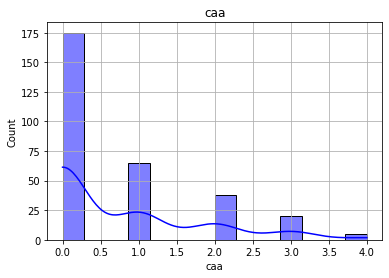

------------------------------------------------------------


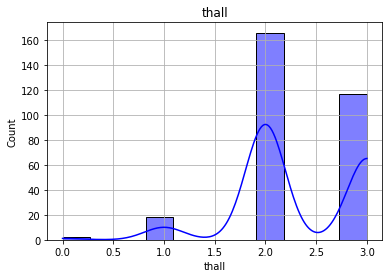

------------------------------------------------------------


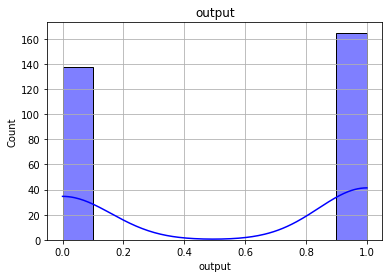

------------------------------------------------------------


In [102]:
for i in df.columns:
    if df.astype != 'O':
        sns.histplot(df[i],kde=True,color='b')
        plt.title(i)
        plt.grid()
        plt.show()
        print('---'*20)

### Feature Engineering

In [12]:
ac = []
for i in df.age:
    if i < 42:
        ac.append('young')
    elif 42 <= i < 54:
        ac.append('middle age')
    elif 54 <= i < 66:
        ac.append('upper middle age')
    elif i > 65:
        ac.append('old')
df['age_catg'] = ac

In [13]:
col = df.pop('age_catg')
df.insert(1,'age_catg',col)

In [14]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,upper middle age,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,young,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,upper middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,upper middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Machine Learning

In [16]:
ac_list = df.age_catg.unique()
ac_id = np.arange(1,len(ac_list)+1) 

In [17]:
df['age_catg'].replace(ac_list,ac_id,True)

In [18]:
df.head()

,age,age_catg,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,1,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = df.drop('output',axis=1)
y = df.output

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=44)

In [48]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

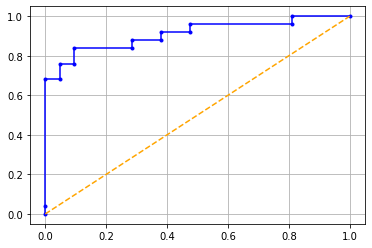


accuracy : 0.782608695652174

roc_auc_score : 0.9104761904761904

Confusion matrix :

[[15  6]
 [ 4 21]]

classification report :

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.78      0.84      0.81        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



In [38]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,lr_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.show()
print('\naccuracy :',accuracy_score(ytest,lr_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,lr_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,lr_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,lr_test_pred))

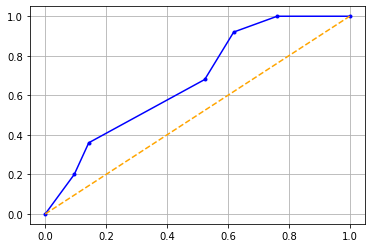


accuracy : 0.5869565217391305

roc_auc_score : 0.6723809523809523

Confusion matrix :

[[10 11]
 [ 8 17]]

classification report :

              precision    recall  f1-score   support

           0       0.56      0.48      0.51        21
           1       0.61      0.68      0.64        25

    accuracy                           0.59        46
   macro avg       0.58      0.58      0.58        46
weighted avg       0.58      0.59      0.58        46



In [39]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,kn_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.show()
print('\naccuracy :',accuracy_score(ytest,kn_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,kn_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,kn_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,kn_test_pred))

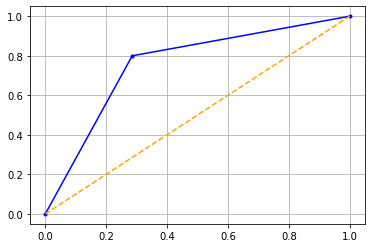


accuracy : 0.7608695652173914

roc_auc_score : 0.7571428571428572

Confusion matrix :

[[15  6]
 [ 5 20]]

classification report :

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.77      0.80      0.78        25

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46



In [40]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,dt_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.show()
print('\naccuracy :',accuracy_score(ytest,dt_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,dt_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,dt_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,dt_test_pred))

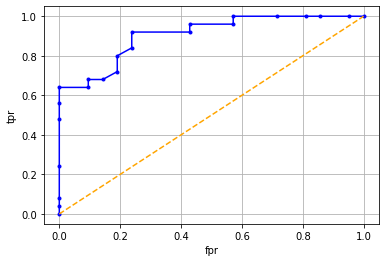


accuracy : 0.8260869565217391

roc_auc_score : 0.9066666666666666

Confusion matrix :

[[16  5]
 [ 3 22]]

classification report :

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.81      0.88      0.85        25

    accuracy                           0.83        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [42]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,rf_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,rf_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,rf_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,rf_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,rf_test_pred))

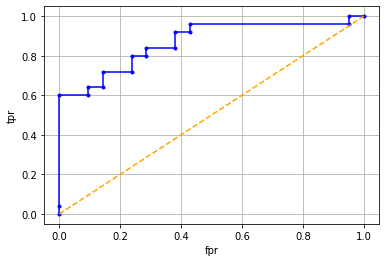


accuracy : 0.782608695652174

roc_auc_score : 0.8685714285714285

Confusion matrix :

[[15  6]
 [ 4 21]]

classification report :

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.78      0.84      0.81        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



In [43]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_pp = gb_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,gb_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,gb_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,gb_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,gb_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,gb_test_pred))

[18:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


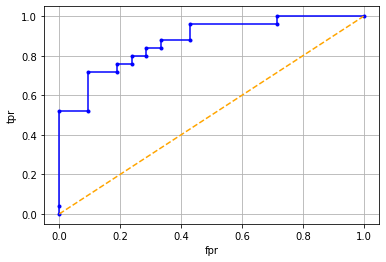


accuracy : 0.7608695652173914

roc_auc_score : 0.8761904761904762

Confusion matrix :

[[15  6]
 [ 5 20]]

classification report :

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.77      0.80      0.78        25

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46



In [44]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,xgb_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,xgb_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,xgb_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,xgb_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,xgb_test_pred))

[18:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


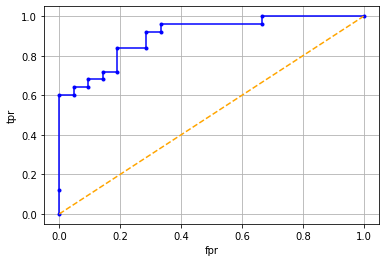


accuracy : 0.8043478260869565

roc_auc_score : 0.9028571428571429

Confusion matrix :

[[17  4]
 [ 5 20]]

classification report :

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.83      0.80      0.82        25

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



In [45]:
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,xgbrf_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,xgbrf_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,xgbrf_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,xgbrf_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,xgbrf_test_pred))

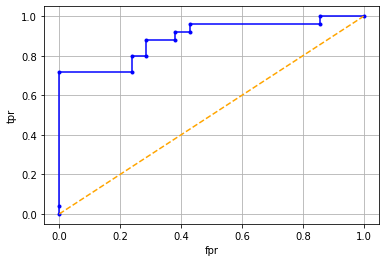


accuracy : 0.782608695652174

roc_auc_score : 0.8914285714285713

Confusion matrix :

[[15  6]
 [ 4 21]]

classification report :

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.78      0.84      0.81        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



In [49]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,cat_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,cat_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,cat_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,cat_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,cat_test_pred))

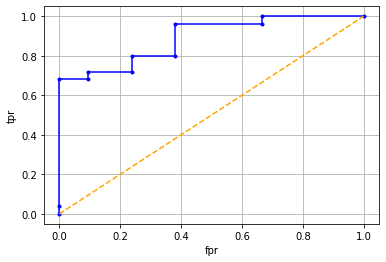


accuracy : 0.7608695652173914

roc_auc_score : 0.8895238095238095

Confusion matrix :

[[15  6]
 [ 5 20]]

classification report :

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.77      0.80      0.78        25

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46



In [50]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
fpr,tpr,thres = roc_curve(ytest,lgb_test_pp)
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--',color='orange')
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('\naccuracy :',accuracy_score(ytest,lgb_test_pred))
print('\nroc_auc_score :',roc_auc_score(ytest,lgb_test_pp))
print('\nConfusion matrix :\n')
print(confusion_matrix(ytest,lgb_test_pred))
print('\nclassification report :\n')
print(classification_report(ytest,lgb_test_pred))

In [51]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
gb_test_pp = gb_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [86]:
# mean_pps = pd.DataFrame({'lr':lr_test_pp,'kn':kn_test_pp,'dt':dt_test_pp,'rf':rf_test_pp,'gb':gb_test_pp,'xgb':xgb_test_pp,
#              'xgbrf':xgbrf_test_pp,'cat':cat_test_pp,'lgb':lgb_test_pp}) ## all models

mean_pps = pd.DataFrame({'lr':lr_test_pp,'dt':dt_test_pp,'rf':rf_test_pp,'gb':gb_test_pp,'xgb':xgb_test_pp,
             'xgbrf':xgbrf_test_pp,'cat':cat_test_pp,'lgb':lgb_test_pp}) ## excluding KNN

In [87]:
mean_pps.head()

,lr,dt,rf,gb,xgb,xgbrf,cat,lgb
0,0.960025,1.0,0.87,0.977537,0.965018,0.840803,0.971326,0.976014
1,0.976596,1.0,0.87,0.686628,0.945907,0.824247,0.926214,0.979480
2,0.802780,0.0,0.49,0.571660,0.281324,0.204365,0.598161,0.449935
3,0.518247,1.0,0.78,0.940470,0.978061,0.824036,0.860324,0.956116
4,0.924168,1.0,0.90,0.979443,0.995732,0.838289,0.964974,0.956260


In [88]:
pps = []
for i in mean_pps.index:
    pps.append(mean_pps.iloc[i].mean())
mean_pps['mean_probas'] = pps

In [89]:
mean_pps.head()

,lr,dt,rf,gb,xgb,xgbrf,cat,lgb,mean_probas
0,0.960025,1.0,0.87,0.977537,0.965018,0.840803,0.971326,0.976014,0.945090
1,0.976596,1.0,0.87,0.686628,0.945907,0.824247,0.926214,0.979480,0.901134
2,0.802780,0.0,0.49,0.571660,0.281324,0.204365,0.598161,0.449935,0.424778
3,0.518247,1.0,0.78,0.940470,0.978061,0.824036,0.860324,0.956116,0.857157
4,0.924168,1.0,0.90,0.979443,0.995732,0.838289,0.964974,0.956260,0.944858


In [90]:
fpr,tpr,thres = roc_curve(ytest,mean_pps['mean_probas'])

In [91]:
print('len of df :',len(pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':thres})))
pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':thres})

len of df : 16


,fpr,tpr,thres
0,0.000000,0.00,1.980348
1,0.000000,0.04,0.980348
2,0.000000,0.72,0.881900
3,0.190476,0.72,0.792752
4,0.190476,0.76,0.763828
5,0.238095,0.76,0.760966
6,0.238095,0.80,0.673615
7,0.333333,0.80,0.424778
8,0.333333,0.88,0.402165
9,0.380952,0.88,0.370610


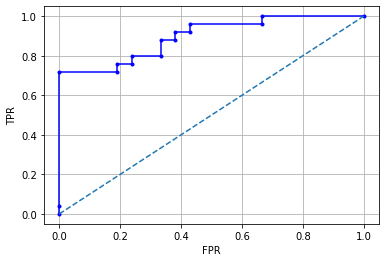

In [92]:
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [98]:
thres[6]

0.6736147914879989

In [99]:
final = []
for i in mean_pps['mean_probas']:
    if i > thres[6]:
        final.append(1)
    else:
        final.append(0)

In [100]:
accuracy_score(ytest,final)

0.7608695652173914

In [101]:
confusion_matrix(ytest,final)

array([[16,  5],
       [ 6, 19]], dtype=int64)

In [102]:
print(classification_report(ytest,final))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        21
           1       0.79      0.76      0.78        25

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46

